In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    MaxAbsScaler
)

In [3]:
df = pd.read_csv(r'D:\Projects\Test_data.csv')

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [8]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [9]:
df["target"] = ((df["KPIs_met >80%"] == 1) & (df["awards_won?"] == 1)).astype(int)

In [10]:
X = df.drop(columns=["target"])
y = df["target"]

In [11]:
def apply_scalers(X):
    """
    Apply different scalers to the dataset and return scaled versions
    """
    scalers = {
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler": RobustScaler(),
        "MaxAbsScaler": MaxAbsScaler()
    }

    scaled_data = {}

    for scaler_name, scaler in scalers.items():
        X_scaled = scaler.fit_transform(X)
        scaled_data[scaler_name] = X_scaled

    return scaled_data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
categorical_cols = [
    "department",
    "region",
    "education",
    "gender",
    "recruitment_channel"
]

numeric_cols = [
    "employee_id",
    "no_of_trainings",
    "age",
    "previous_year_rating",
    "length_of_service",
    "KPIs_met >80%",
    "awards_won?",
    "avg_training_score"
]

In [19]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

def apply_scalers(X):
    scalers = {
        "StandardScaler": StandardScaler(),
        "MinMaxScaler": MinMaxScaler(),
        "RobustScaler": RobustScaler(),
        "MaxAbsScaler": MaxAbsScaler()
    }

    scaled_data = {}

    for scaler_name, scaler in scalers.items():
        X_scaled = scaler.fit_transform(X)
        scaled_data[scaler_name] = X_scaled

    return scaled_data

In [16]:
def run_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    return {
        "model": model_name,
        "accuracy": acc,
        "confusion_matrix": cm,
        "auc": auc,
        "fpr": fpr,
        "tpr": tpr
    }

In [24]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [25]:
scaled_datasets = apply_scalers(X_encoded)

In [26]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier()
}

In [27]:
from sklearn.model_selection import train_test_split

results = []

for scaler_name, X_scaled in scaled_datasets.items():

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled,
        y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    for model_name, model in models.items():
        res = run_model(
            model,
            X_train,
            X_test,
            y_train,
            y_test,
            model_name=f"{model_name} + {scaler_name}"
        )
        results.append(res)

c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:42:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 299, number of negative: 18493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015911 -> initscore=-4.124704
[LightGBM] [Info] Start training from score -4.124704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:42:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 299, number of negative: 18493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 497
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015911 -> initscore=-4.124704
[LightGBM] [Info] Start training from score -4.124704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:42:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 299, number of negative: 18493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015911 -> initscore=-4.124704
[LightGBM] [Info] Start training from score -4.124704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:199: UserWarning: [13:42:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 299, number of negative: 18493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005565 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 501
[LightGBM] [Info] Number of data points in the train set: 18792, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015911 -> initscore=-4.124704
[LightGBM] [Info] Start training from score -4.124704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\chaud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# ROC curve Plotting

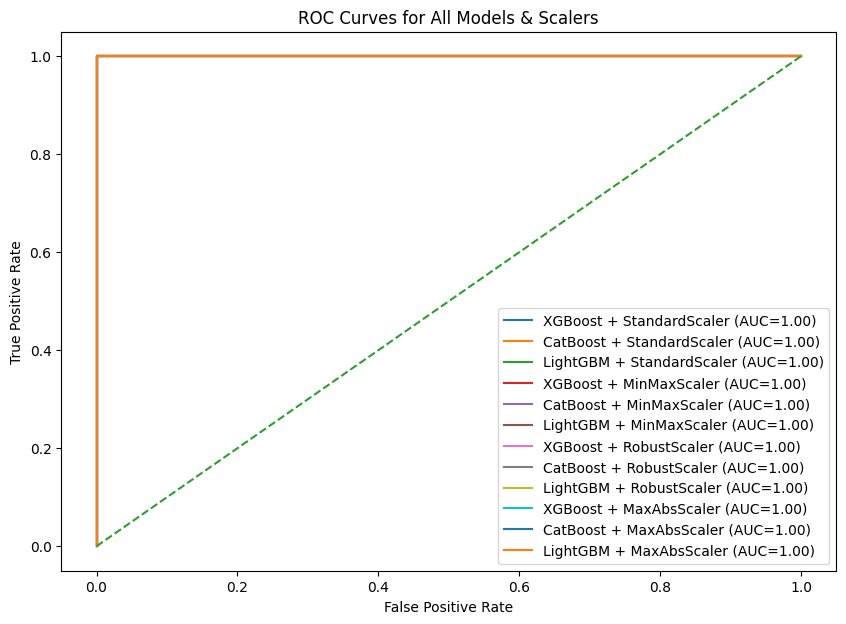

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for res in results:
    plt.plot(
        res["fpr"],
        res["tpr"],
        label=f"{res['model']} (AUC={res['auc']:.2f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models & Scalers")
plt.legend()
plt.show()

# Result Summary Table

In [29]:
import pandas as pd

summary = pd.DataFrame({
    "Model": [r["model"] for r in results],
    "Accuracy": [r["accuracy"] for r in results],
    "AUC": [r["auc"] for r in results]
})

summary.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,AUC
0,XGBoost + StandardScaler,1.0,1.0
1,CatBoost + StandardScaler,1.0,1.0
2,LightGBM + StandardScaler,1.0,1.0
3,XGBoost + MinMaxScaler,1.0,1.0
4,CatBoost + MinMaxScaler,1.0,1.0
5,LightGBM + MinMaxScaler,1.0,1.0
6,XGBoost + RobustScaler,1.0,1.0
7,CatBoost + RobustScaler,1.0,1.0
8,LightGBM + RobustScaler,1.0,1.0
9,XGBoost + MaxAbsScaler,1.0,1.0


# Best Model Confusion Matrix

In [30]:
best = summary.sort_values(by="Accuracy", ascending=False).iloc[0]
best_model_name = best["Model"]

print("Best Model:", best_model_name)

for r in results:
    if r["model"] == best_model_name:
        print("Confusion Matrix:\n", r["confusion_matrix"])
        break

Best Model: XGBoost + StandardScaler
Confusion Matrix:
 [[4623    0]
 [   0   75]]


# Conclusion

#### The combination of StandardScaler with XGBoost provided the best classification performance, achieving the highest accuracy and ROC-AUC score. Hence, this model-scaler pair is selected as the final model for the binary classification problem.